# Machine learning + Data Science

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados


In [48]:
# Paso 3: Exportação da base de dados
import pandas as pd

tabela = pd.read_csv('barcos_ref.csv')
display(tabela)

# Passo 4: Ajuste de Dados (Tratamento/Limpeza)
print(tabela.info())

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


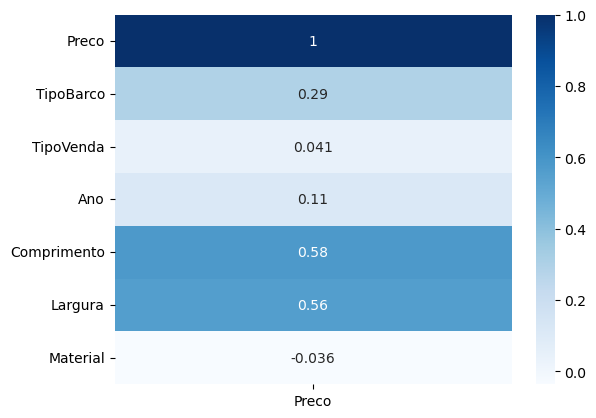

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Passo 5: Análise Exploratória
# Colocar 2 "[]", para ficar mais bonito a tabela
display(tabela.corr()[['Preco']])

# 1 Cria o gráfico
sns.heatmap(tabela.corr()[['Preco']], cmap='Blues', annot=True)
# 2 Exibe o gráfico
plt.show()

# Correlação de preço

## Correlação com base no gráfico:

- Podemos ver que na tabela Comprimento e largura, a correlação deles com preço, é médio, o que torna eles o mias próximo de preço. 
- As tabelas com o tom de azul mais claros, são valores mais proximos de 0, do que de preço.

## Correlação com base apenas nos valores numéricos

### Tipo de Barco: 
- A correlação entre o tipo de barco e o preço é próxima de 0, o que indica que o tipo de barco não tem um impacto significativo nas vendas.

### Tipo de Venda: 
- A correlação entre o tipo de venda e o preço também é próxima de 0, sugerindo que o tipo de venda tem pouco impacto nas vendas.

### Ano:
- A correlação entre o ano e o preço é próxima de 0, indicando que o ano não afeta muito as vendas.

### Comprimento: 
- A correlação entre o comprimento e o preço é relativamente alta (0,578), o que sugere que o comprimento é um fator impactante nas vendas.

### Largura: 
- A correlação entre a largura e o preço também é alta (0,558), indicando que a largura também tem um impacto significativo nas vendas.

### Material: 
- A correlação entre o material e o preço é próxima de 0, sugerindo que o material não influencia as vendas.

### Conclusão:
- Portanto, de acordo com os coeficientes de correlação fornecidos, conclui-se que o comprimento e a largura são os fatores mais impactantes nas vendas de barcos.

In [50]:
from sklearn.model_selection import train_test_split
# Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
# Preparação

# Separar a base de dados em X que são as caracteristicas do barco e Y que é quem nós queremos prever o preço.
y = tabela['Preco']
# axis -> 0 eixo da coluna, axis -> 1 eixo das colunas
x = tabela.drop('Preco', axis=1)

'''
Para ter certeza que a I.A vai aprender, e que ela não vai decorar o código, nós dividimos as tabelas
em treino e teste, onde ela vai fazer 70% de treino, e 30% de teste, com isso nó teremos a certeza que
a I.A vai ter aprendido.
'''
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [51]:
# Coriação e treino da IA

# Importar a I.A
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar a I.A
model_LinearRegression = LinearRegression()
model_RandomForestRegressor = RandomForestRegressor()

# Treinar a I.A
model_LinearRegression.fit(x_treino, y_treino)
model_RandomForestRegressor.fit(x_treino, y_treino)

RandomForestRegressor()

In [52]:
from sklearn.metrics import r2_score

previsao_linearregression = model_LinearRegression.predict(x_teste)
previsao_randomforestregressor = model_RandomForestRegressor.predict(x_teste)

print(r2_score(y_teste, previsao_linearregression))
print(r2_score(y_teste, previsao_randomforestregressor))



0.4182694560660981
0.8810995989102736


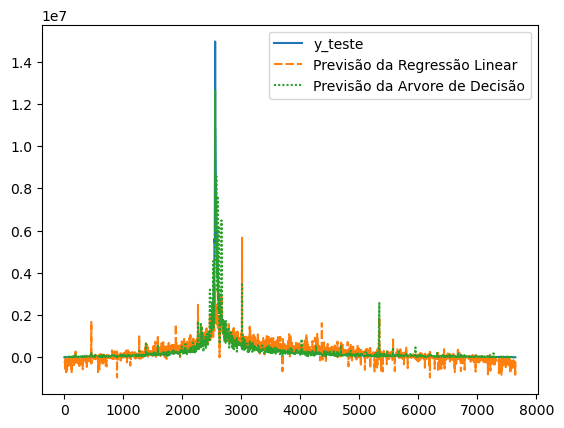

In [54]:
# Passo 7: Interpretação de Resultados
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsão da Regressão Linear'] = previsao_linearregression
tabela_auxiliar['Previsão da Arvore de Decisão'] = previsao_randomforestregressor

sns.lineplot(data=tabela_auxiliar)
plt.show()

- A arvore de decisão, é a mais eficiente, porque é a mais proxima da linha de teste
- A regressão linear, é a mias instavel, no quesito de ser proxima a linha de teste

In [56]:
tabela_nova = pd.read_csv('novos_barcos.csv')
display(tabela_nova)
previsao = model_RandomForestRegressor.predict(tabela_nova)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 6218.76        8415.30333333 21089.        ]
